# Project setup

Import libraries

In [13]:
import os
import pandas
import random
random.seed(42)

First we establish the directory to where our data is stored.

In [14]:
DIR = 'chinese-handwriting-recognition-hsk-1/chinese-handwriting/'
TRAIN_PATH = DIR + 'CASIA-HWDB_Train/Train/'
TEST_PATH = DIR + 'CASIA-HWDB_Test/Test/'

# Data investigation

First lets have a look at how many data classes we have in the dataset. The dataset has been split into test and train already so lets check how many classes we have in each.

In [15]:
image_classes_train = set(os.listdir(TRAIN_PATH))
image_classes_test = set(os.listdir(TEST_PATH))
print(len(image_classes_train), image_classes_train)
print(len(image_classes_test), image_classes_test)

if image_classes_train == image_classes_test:
    print('The same classes are in each folder')
    image_classes = image_classes_train
else:
    print('The two folders contain different classes')


178 {'写', '北', '少', '习', '米', '月', '姐', '高', '下', '猫', '块', '东', '钟', '欢', '日', '子', '能', '那', '客', '影', '字', '饭', '昨', '冷', '时', '医', '院', '国', '女', '午', '后', '吃', '住', '爸', '今', '回', '工', '她', '六', '没', '九', '狗', '叫', '做', '果', '现', '分', '作', '是', '雨', '这', '去', '不', '京', '亮', '八', '在', '觉', '们', '学', '大', '有', '喂', '小', '西', '爱', '五', '脑', '来', '吗', '上', '车', '哪', '三', '儿', '兴', '话', '面', '服', '妈', '买', '水', '校', '商', '中', '同', '个', '读', '菜', '二', '点', '年', '椅', '明', '茶', '名', '样', '听', '喜', '看', '热', '一', '候', '都', '星', '坐', '些', '里', '打', '友', '见', '期', '桌', '多', '书', '飞', '关', '人', '苹', '站', '天', '生', '钱', '本', '语', '店', '想', '说', '的', '馆', '么', '再', '识', '什', '杯', '视', '我', '对', '机', '师', '家', '请', '睡', '电', '几', '前', '十', '开', '他', '认', '先', '了', '租', '系', '和', '怎', '太', '汉', '好', '气', '喝', '七', '呢', '火', '四', '衣', '朋', '很', '会', '你', '老', '起', '岁', '出', '漂', '谁', '零', '谢'}
178 {'写', '北', '少', '习', '米', '月', '姐', '高', '下', '猫', '块', '东', '钟', '欢', '日', '子', '能', '那', '客', '影', 

Next, lets combine the the train and test data into one directory for simplicity.

In [16]:
import shutil
COMBINED_PATH = DIR + 'data/'

if os.path.exists(COMBINED_PATH):
    shutil.rmtree(COMBINED_PATH)
    
os.mkdir(COMBINED_PATH)

In [17]:
import shutil

# Copy train directory into combined
for image_class in image_classes:
    source_path = f"{TRAIN_PATH}{image_class}"
    destination_path = f"{COMBINED_PATH}{image_class}"
    shutil.copytree(source_path, destination_path)

# Count how many images in each class in train set
class_counts = {}
for image_class in image_classes:
    path = f"{COMBINED_PATH}{image_class}/"
    class_counts[image_class] = len(os.listdir(path))

# Copy all the

#
for image_class in image_classes:
    source_path = f"{TEST_PATH}{image_class}/"
    destination_path = f"{COMBINED_PATH}{image_class}/"
    
    for filename in os.listdir(source_path):
        class_counts[image_class] += 1
        new_filename = f"{class_counts[image_class]}.png"
        shutil.copy(os.path.join(source_path, filename), os.path.join(destination_path, new_filename))
        

{'写': 743, '北': 743, '少': 741, '习': 743, '米': 743, '月': 748, '姐': 740, '高': 743, '下': 745, '猫': 740, '块': 741, '东': 743, '钟': 744, '欢': 740, '日': 740, '子': 741, '能': 741, '那': 742, '客': 741, '影': 747, '字': 737, '饭': 741, '昨': 741, '冷': 739, '时': 742, '医': 744, '院': 744, '国': 742, '女': 741, '午': 743, '后': 741, '吃': 744, '住': 741, '爸': 741, '今': 743, '回': 740, '工': 741, '她': 741, '六': 733, '没': 740, '九': 744, '狗': 743, '叫': 743, '做': 745, '果': 740, '现': 740, '分': 742, '作': 743, '是': 743, '雨': 747, '这': 739, '去': 740, '不': 746, '京': 745, '亮': 741, '八': 745, '在': 747, '觉': 740, '们': 737, '学': 743, '大': 747, '有': 746, '喂': 741, '小': 741, '西': 741, '爱': 743, '五': 740, '脑': 740, '来': 741, '吗': 739, '上': 741, '车': 745, '哪': 740, '三': 740, '儿': 743, '兴': 741, '话': 741, '面': 738, '服': 743, '妈': 737, '买': 739, '水': 740, '校': 741, '商': 741, '中': 739, '同': 741, '个': 744, '读': 739, '菜': 743, '二': 744, '点': 741, '年': 743, '椅': 744, '明': 740, '茶': 738, '名': 740, '样': 721, '听': 740, '喜': 741, '看': 745,

<Axes: >

/home/miikey_lol/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  func(*args, **kwargs)
/home/miikey_lol/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 24433 (\N{CJK UNIFIED IDEOGRAPH-5F71}) missing from current font.
  func(*args, **kwargs)
/home/miikey_lol/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 38632 (\N{CJK UNIFIED IDEOGRAPH-96E8}) missing from current font.
  func(*args, **kwargs)
/home/miikey_lol/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  func(*args, **kwargs)
/home/miikey_lol/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 22312 (\N{CJK UNIFIED IDEOGRAPH-5728}) missing from current font.
  func(*args, **kwargs)
/home/miikey_lol/.local/lib/python3.10/site-packages/IP

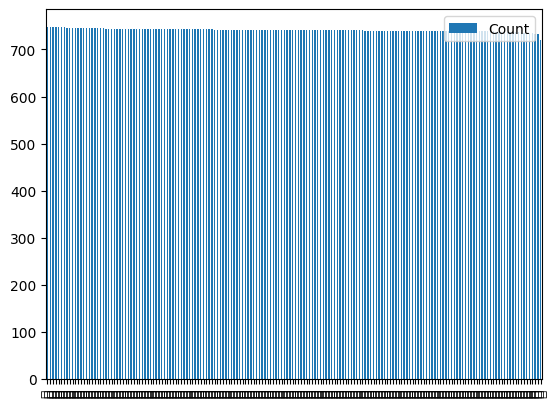

In [18]:
import pandas as pd
print(class_counts)

# Convert class_counts dictionary to a pandas dataframe
df_class_counts = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Count'])

# Sort the dataframe by count in descending order
df_class_counts_sorted = df_class_counts.sort_values(by='Count', ascending=False)

# Plot the dataframe as a bar chart
df_class_counts_sorted.plot(kind='bar')
